This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. 
This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. 
There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. We are trying to buld a model that predicts next day min and max temp.

"""Attribute Information:


1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
"""

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('temperature.csv')

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

There are 7752 rows and 25 columns

In [11]:
pd.set_option('display.max_rows',None)

In [12]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [162]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Above is the number of null values in each column

In [163]:
df[df['LDAPS_RHmin'].isna()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1025,1.0,10-08-2013,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3
1026,2.0,10-08-2013,29.7,25.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2
1027,3.0,10-08-2013,29.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0
1028,4.0,10-08-2013,30.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5
1029,5.0,10-08-2013,29.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3
1030,6.0,10-08-2013,29.6,26.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5102,127.042,54.6384,0.1457,5161.604004,34.8,24.2
1031,7.0,10-08-2013,29.5,26.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5776,126.838,12.3700,0.0985,5140.230957,34.7,25.2
1032,8.0,10-08-2013,29.4,25.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.4697,126.910,52.5180,1.5629,5145.487793,34.1,25.1
1033,9.0,10-08-2013,28.6,25.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.4967,126.826,50.9312,0.4125,5170.145020,33.9,23.6
1034,10.0,10-08-2013,29.0,24.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.4562,126.955,208.5070,5.1782,5117.305176,33.5,22.8


Located the rows where null values were there.It was seen that missing values were present on the same rows in different columns.ie.many feature data were missing in a particular row.Thus we decided to drop those rows instead of replacing it with mean/median 

In [164]:
df1=df.dropna()

In [165]:
df1.shape

(7588, 25)

In [166]:
(7752-7588)/7752*100

2.1155830753353975

In [167]:
df1.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [168]:
df1['Date']=pd.to_datetime(df1['Date'])

data type of date column was changed from object to date-time

In [169]:
df1["Year"]=df1["Date"].dt.year

In [170]:
df1["Month"]=df1["Date"].dt.month

In [171]:
df1["Day"]=df1["Date"].dt.day

date time column was then split into three different column for easier analysis

In [172]:
df1.drop('Date',axis=1,inplace=True)

In [173]:
df1.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


In [175]:
df1.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,2014.991697,7.068134,16.337375
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,1.410877,2.242389,8.216880
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


Extreme values indicating outlier were seen in LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT1,LDAPS_PPT4,DEM,slope etc.

In [32]:
df1.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day'],
      dtype='object')

# Univariate analysis

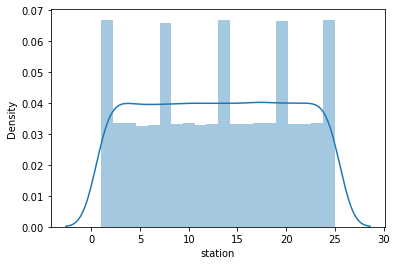

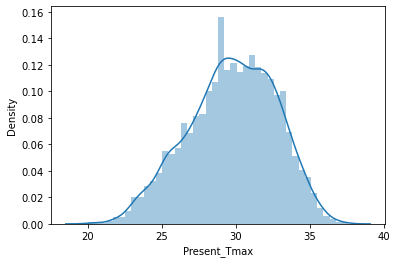

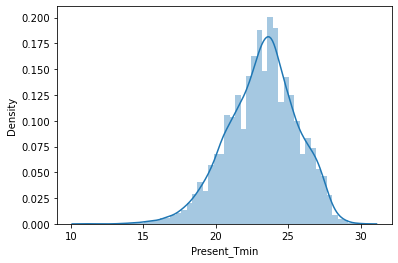

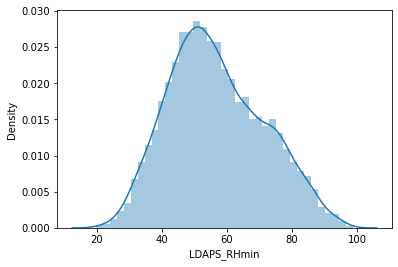

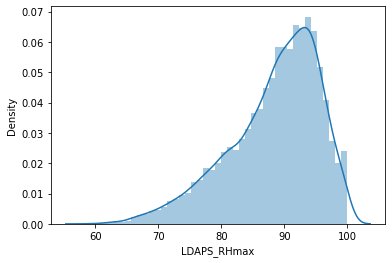

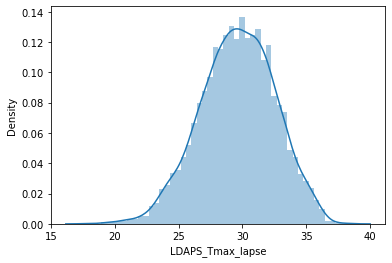

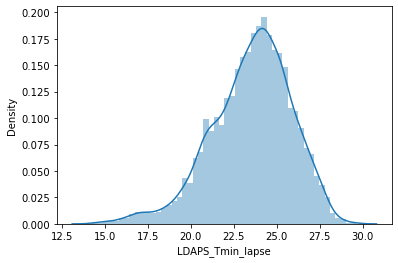

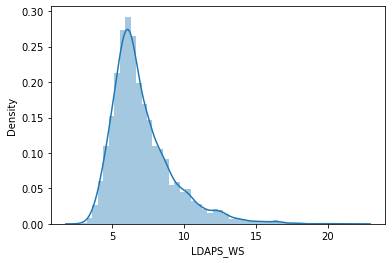

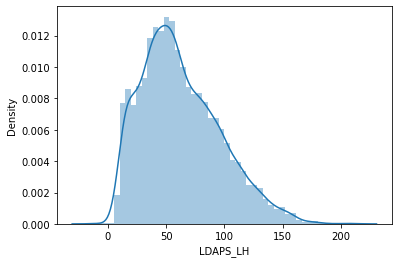

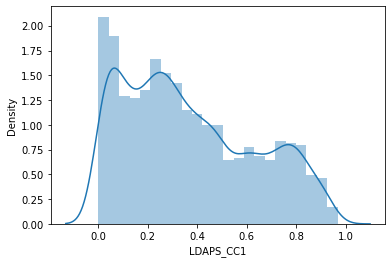

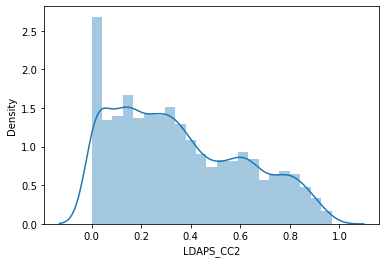

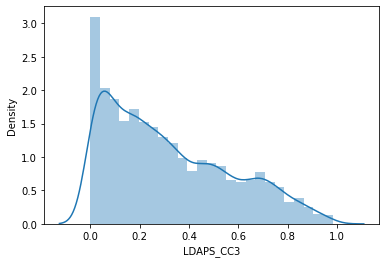

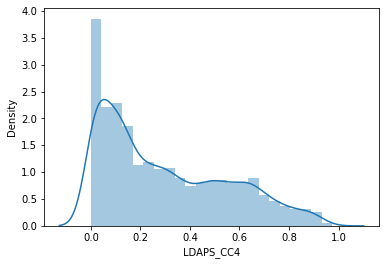

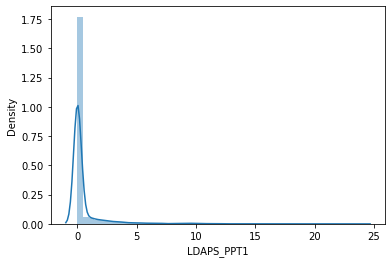

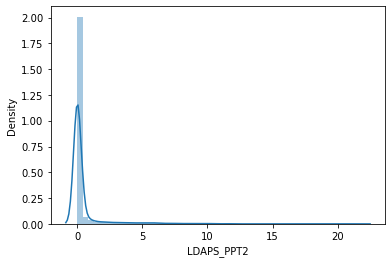

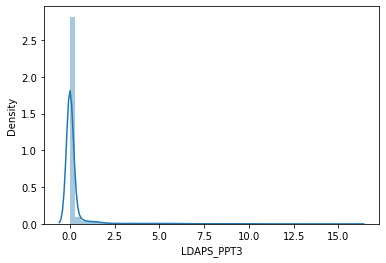

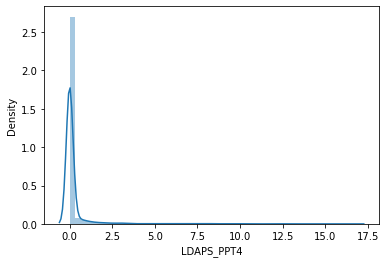

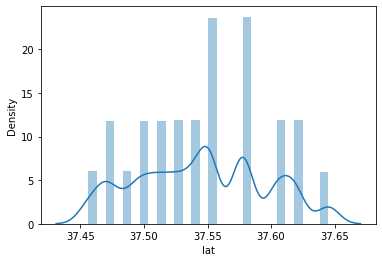

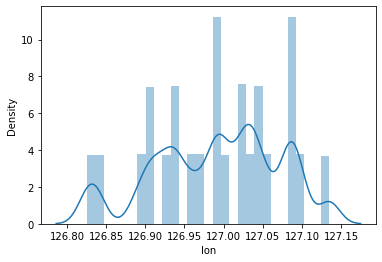

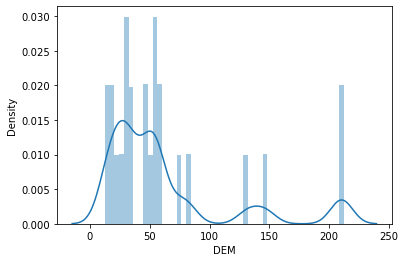

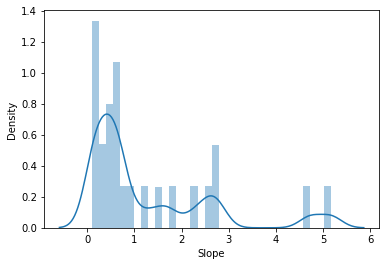

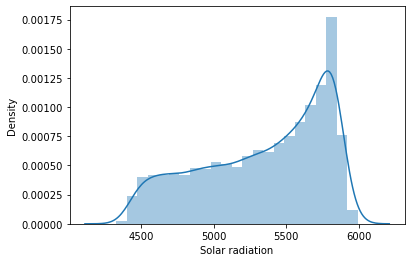

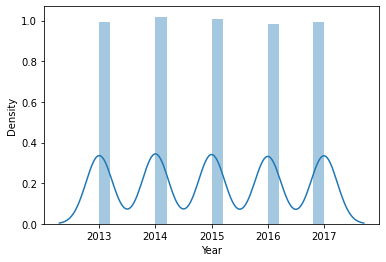

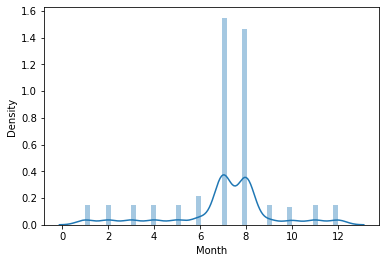

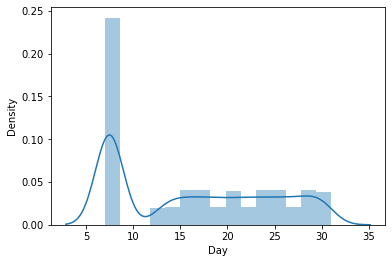

In [41]:
columns= ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
         'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope','Solar radiation','Year','Month','Day']
for i in df1[columns]:
    plt.figure()
    sb.distplot(df1[i])

Few of the columns like- LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',DEM', 'Slope'were seen to be skewed and also indicated outliers.

# Bivariate analysis

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='LDAPS_PPT1'>

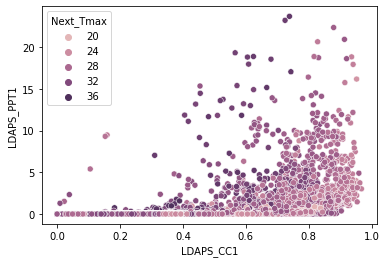

In [43]:
#to find the relationship between cloud cover and precipitation with reference to output column 
sb.scatterplot(df1['LDAPS_CC1'],df1['LDAPS_PPT1'],hue=df1['Next_Tmax'])

It was observed that with increase in cloud cover and precipitation, the temperature decreased.also that cloud coverage and precipitation were positively related.The temp ranged between 20-24 degree when cloud cover was maximum

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='LDAPS_PPT1'>

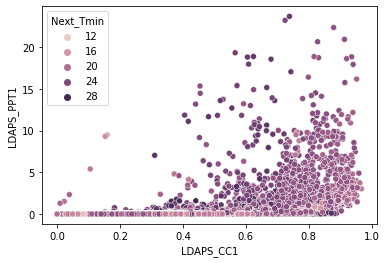

In [44]:
sb.scatterplot(df1['LDAPS_CC1'],df1['LDAPS_PPT1'],hue=df1['Next_Tmin'])

similar observation was seen with reference to T_min ie our second output too.The min temp ranged between16-20 when cloud coverage was max.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='LDAPS_PPT2'>

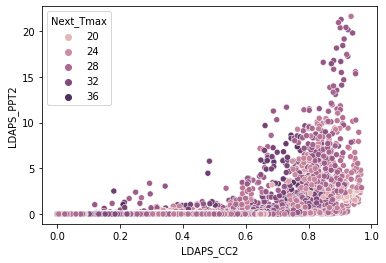

In [47]:
sb.scatterplot(df1['LDAPS_CC2'],df1['LDAPS_PPT2'],hue=df1['Next_Tmax'])


At 6-11 hr also similar result were seen with reference to next_tmax.But the max temp ranged between24-28 degree representing moderate temperature at this time point.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='LDAPS_PPT2'>

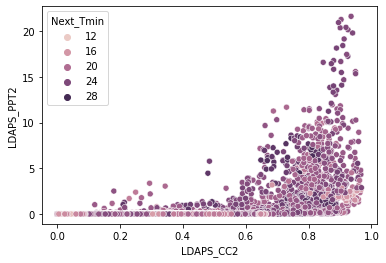

In [48]:
sb.scatterplot(df1['LDAPS_CC2'],df1['LDAPS_PPT2'],hue=df1['Next_Tmin'])

At 6-11 hr also similar result were seen with reference to next_tmin,Min temp ranged between 16-20 degree.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='LDAPS_PPT3'>

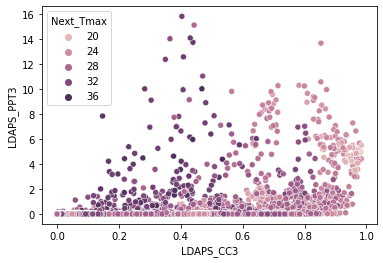

In [49]:
sb.scatterplot(df1['LDAPS_CC3'],df1['LDAPS_PPT3'],hue=df1['Next_Tmax'])


In [ ]:
from 12-17 hrs the max temp was lowered and was between 20-24 degree at max cloud coverage.The temp was cold at this time point in majority of the cases.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='LDAPS_PPT3'>

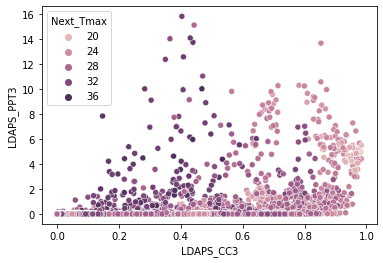

In [50]:
sb.scatterplot(df1['LDAPS_CC3'],df1['LDAPS_PPT3'],hue=df1['Next_Tmin'])

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='LDAPS_PPT4'>

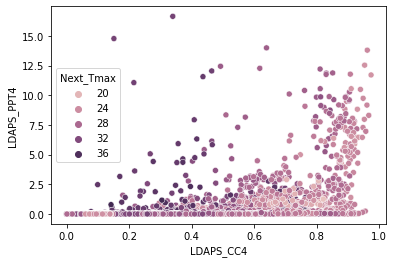

In [51]:
sb.scatterplot(df1['LDAPS_CC4'],df1['LDAPS_PPT4'],hue=df1['Next_Tmax'])


<AxesSubplot:xlabel='LDAPS_CC4', ylabel='LDAPS_PPT4'>

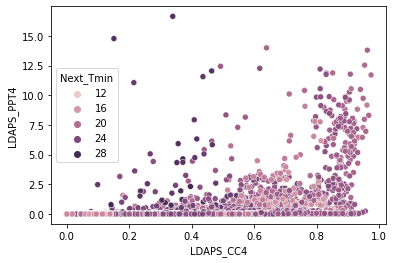

In [52]:
sb.scatterplot(df1['LDAPS_CC4'],df1['LDAPS_PPT4'],hue=df1['Next_Tmin'])

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

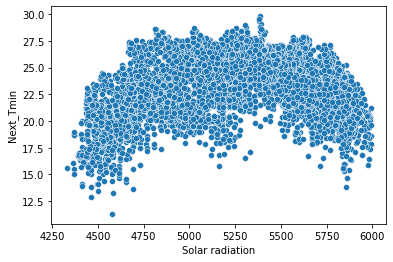

In [53]:
#Solar radiation
sb.scatterplot(df1['Solar radiation'],df1['Next_Tmin'])

The solar radiation ranged from 4500-6000 and at maximum radiation the temp is 27.5 degree.

In [71]:
#to find clear correlation of all the attributes
cor=df1.corr()

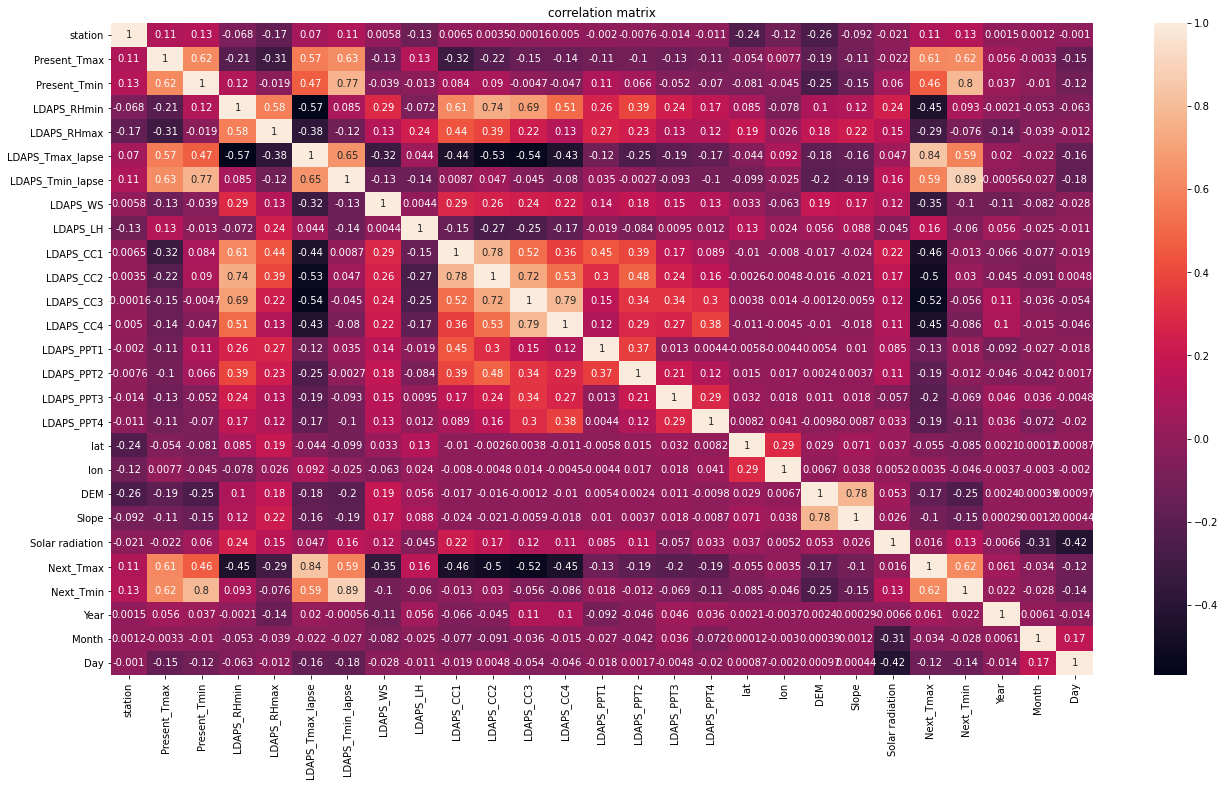

In [72]:
plt.figure(figsize=(22,12))
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show()

with the above plot we can infer that max temp is positively correlated to min temp.Secondly,DEM and Slope are also positively related.Also cloud coverage and precipitation are positively correlated.

In [73]:
#to see the correclation of target column with all attributes
cor['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835729
Next_Tmin           0.616629
Present_Tmax        0.610357
LDAPS_Tmin_lapse    0.592119
Present_Tmin        0.463523
LDAPS_LH            0.156779
station             0.107747
Year                0.061211
Solar radiation     0.016145
lon                 0.003502
Month              -0.033684
lat                -0.055367
Slope              -0.104279
Day                -0.122303
LDAPS_PPT1         -0.125954
DEM                -0.174578
LDAPS_PPT2         -0.186722
LDAPS_PPT4         -0.190720
LDAPS_PPT3         -0.203554
LDAPS_RHmax        -0.289788
LDAPS_WS           -0.351107
LDAPS_RHmin        -0.446824
LDAPS_CC4          -0.454039
LDAPS_CC1          -0.459705
LDAPS_CC2          -0.498295
LDAPS_CC3          -0.523061
Name: Next_Tmax, dtype: float64

In [ ]:
our first output 'Next_Tmax' is positively correlated to LDAPS_Tmax_lapse,Next_Tmin,Present_Tmax,LDAPS_Tmin_lapse,Present_Tmin,
LDAPS_LH

In [74]:
#to see the correclation of second target column with all attributes
cor['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886513
Present_Tmin        0.796975
Present_Tmax        0.621048
Next_Tmax           0.616629
LDAPS_Tmax_lapse    0.589963
station             0.128184
Solar radiation     0.125517
LDAPS_RHmin         0.093249
LDAPS_CC2           0.030358
Year                0.021617
LDAPS_PPT1          0.018031
LDAPS_PPT2         -0.012462
LDAPS_CC1          -0.012877
Month              -0.028344
lon                -0.045758
LDAPS_CC3          -0.056490
LDAPS_LH           -0.060392
LDAPS_PPT3         -0.068664
LDAPS_RHmax        -0.076415
lat                -0.085136
LDAPS_CC4          -0.086197
LDAPS_WS           -0.102021
LDAPS_PPT4         -0.114900
Day                -0.135865
Slope              -0.148379
DEM                -0.249303
Name: Next_Tmin, dtype: float64

our second output 'Next_Tmin' is positively correlated to LDAPS_Tmax_lapse,Next_Tmax,Present_Tmax,LDAPS_Tmin_lapse,Present_Tmin,
LDAPS_LH

In [75]:
df1.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day'],
      dtype='object')

# Boxplot analysis

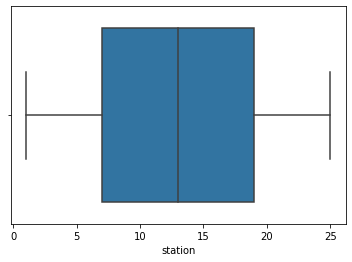

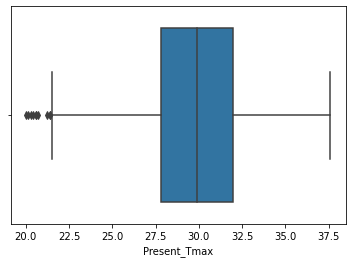

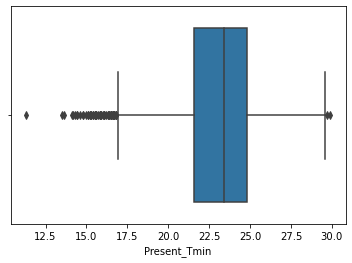

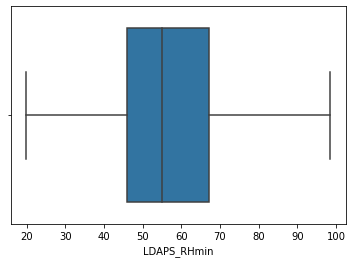

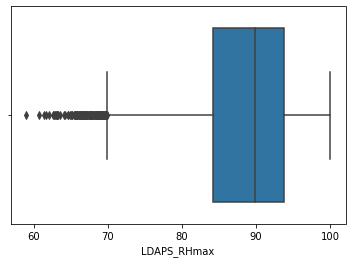

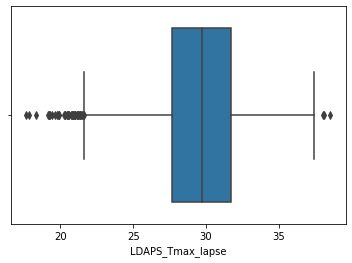

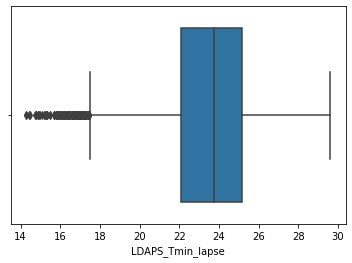

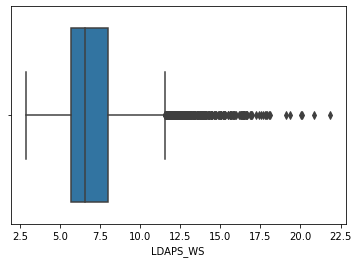

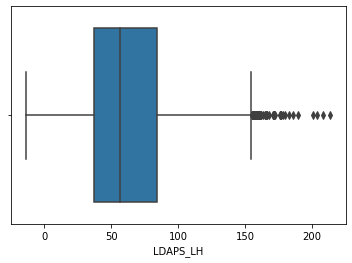

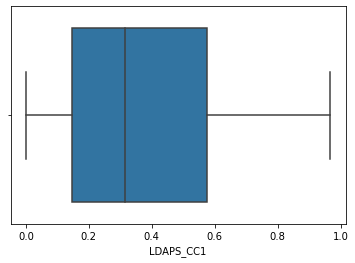

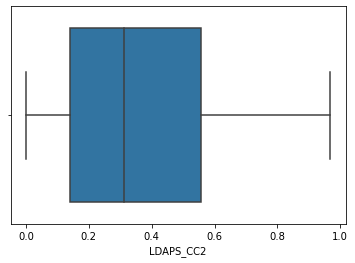

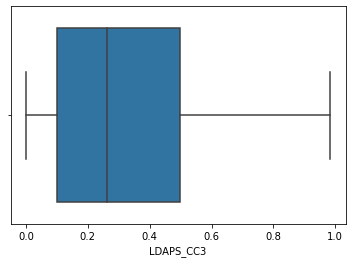

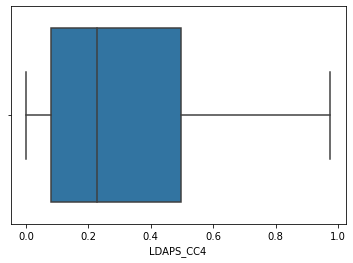

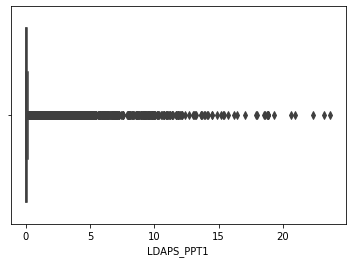

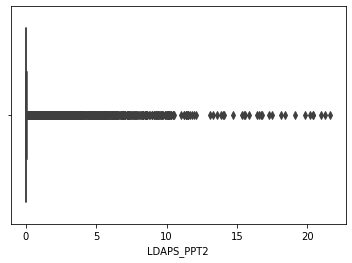

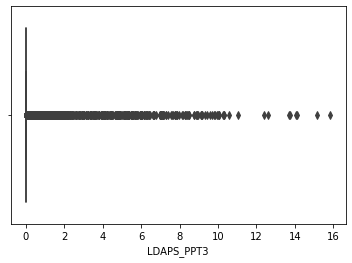

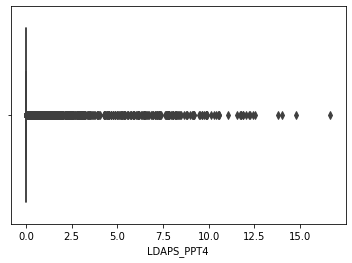

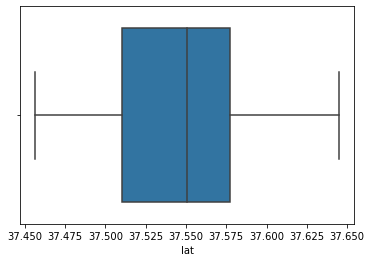

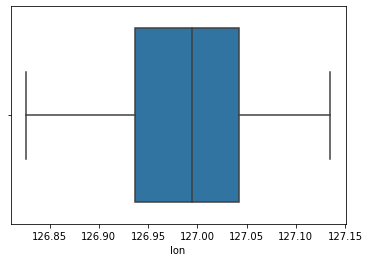

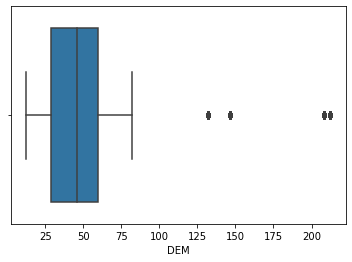

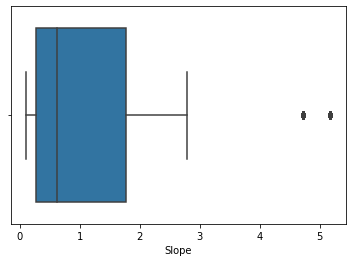

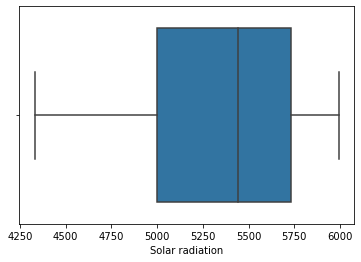

In [76]:
columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse','LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation']
for i in df1[columns]:
    plt.figure()
    sb.boxplot(df1[i])

extreme outlier seen in 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3.

# treating outliers

In [84]:
#function for detect Outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    return (lower_bridge,upper_bridge)

In [85]:
#removing outlier from column='Present_Tmax'
outlier_IQR(df1,'Present_Tmax')


(21.5, 38.3)

In [86]:
df1.loc[df1['Present_Tmax']>=38.3,'Present_Tmax'] = 38.3
df1.loc[df1['Present_Tmax']<=21.5,'Present_Tmax'] = 21.5

In [87]:
outlier_IQR(df1,'Present_Tmin')

(16.800000000000004, 29.6)

In [88]:
df1.loc[df1['Present_Tmin']>=29.6,'Present_Tmin'] = 29.6
df1.loc[df1['Present_Tmin']<=16.8,'Present_Tmin'] = 16.8

In [89]:
outlier_IQR(df1,'LDAPS_RHmax')

(69.89522170375002, 108.05122757374997)

In [90]:
df1.loc[df1['LDAPS_RHmax']>=108,'LDAPS_RHmax'] = 108
df1.loc[df1['LDAPS_RHmax']<=69.8,'LDAPS_RHmax'] = 69.8

In [91]:
outlier_IQR(df1,'LDAPS_Tmin_lapse')

(17.483559955000008, 29.758920254999996)

In [92]:
df1.loc[df1['LDAPS_Tmin_lapse']>=29.75,'LDAPS_Tmin_lapse'] = 29.75
df1.loc[df1['LDAPS_Tmin_lapse']<=17.4,'LDAPS_Tmin_lapse'] = 17.4

In [93]:
outlier_IQR(df1,'LDAPS_WS')

(2.144953807874999, 11.559364270875001)

In [94]:
df1.loc[df1['LDAPS_WS']>=11.55,'LDAPS_WS'] = 11.55
df1.loc[df1['LDAPS_WS']<=2.1,'LDAPS_WS'] = 2.1

In [95]:
outlier_IQR(df1,'LDAPS_Tmax_lapse')

(21.617725678749995, 37.76713960875)

In [96]:
df1.loc[df1['LDAPS_Tmax_lapse']>=37.7,'LDAPS_Tmax_lapse'] = 37.7
df1.loc[df1['LDAPS_Tmax_lapse']<=21.6,'LDAPS_Tmax_lapse'] = 21.6

In [97]:
outlier_IQR(df1,'LDAPS_PPT1')

(-0.078891181875, 0.131485303125)

In [98]:
df1.loc[df1['LDAPS_PPT1']>=0.13,'LDAPS_PPT1'] = 0.13
df1.loc[df1['LDAPS_PPT1']<=-0.07,'LDAPS_PPT1'] = -0.07

In [99]:
outlier_IQR(df1,'LDAPS_PPT2')

(-0.026603085749999998, 0.044338476249999995)

In [101]:
df1.loc[df1['LDAPS_PPT2']>=0.044,'LDAPS_PPT2'] = 0.044
df1.loc[df1['LDAPS_PPT2']<=-0.02,'LDAPS_PPT2'] = -0.02

In [102]:
outlier_IQR(df1,'LDAPS_PPT3')

(-0.01178187525, 0.019636458750000002)

In [103]:
df1.loc[df1['LDAPS_PPT3']>=0.019,'LDAPS_PPT3'] = 0.019
df1.loc[df1['LDAPS_PPT3']<=-0.011,'LDAPS_PPT3'] = -0.011

In [104]:
outlier_IQR(df1,'LDAPS_PPT4')

(-2.5274999999999998e-05, 4.2124999999999994e-05)

In [105]:
df1.loc[df1['LDAPS_PPT4']>=4.21,'LDAPS_PPT4'] = 4.21
df1.loc[df1['LDAPS_PPT4']<=-2.52,'LDAPS_PPT4'] = -2.52

In [106]:
outlier_IQR(df1,'DEM')

(-17.9986, 106.531)

In [107]:
df1.loc[df1['DEM']>=106.53,'DEM'] = 106.53
df1.loc[df1['DEM']<=-17.99,'DEM'] = -17.99

In [108]:
outlier_IQR(df1,'Slope')

(-1.9734500000000001, 4.01255)

In [110]:
df1.loc[df1['Slope']>=4.01,'Slope'] = 4.01
df1.loc[df1['Slope']<=-1.97,'Slope'] = -1.97

In [111]:
copy=df1.copy()

In [112]:
copy.head(2)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,106.5300,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30


# splitting the data

In [129]:
x=df1.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df1.iloc[:,22:24]   # since there are two outputs    

In [130]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,106.5300,2.7850,5992.895996,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013,6,30


In [131]:
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


In [132]:
x.skew()

station            -0.004178
Present_Tmax       -0.249234
Present_Tmin       -0.263286
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.741609
LDAPS_Tmax_lapse   -0.169262
LDAPS_Tmin_lapse   -0.431357
LDAPS_WS            0.824349
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          0.960815
LDAPS_PPT2          1.167554
LDAPS_PPT3          1.172745
LDAPS_PPT4          4.497640
lat                 0.085377
lon                -0.289048
DEM                 0.728454
Slope               1.176516
Solar radiation    -0.524325
Year                0.013575
Month              -0.703092
Day                 0.245563
dtype: float64

# removing skewness

In [133]:
from sklearn.preprocessing import power_transform

In [134]:
new_df1=power_transform(x)

In [135]:
new_df1=pd.DataFrame(new_df1,columns=x.columns)

In [136]:
new_df1.skew()

station            -0.206291
Present_Tmax       -0.036964
Present_Tmin       -0.022096
LDAPS_RHmin        -0.018008
LDAPS_RHmax        -0.118800
LDAPS_Tmax_lapse   -0.017367
LDAPS_Tmin_lapse   -0.029980
LDAPS_WS            0.018136
LDAPS_LH            0.028141
LDAPS_CC1           0.048221
LDAPS_CC2           0.047595
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          0.837501
LDAPS_PPT2          1.018760
LDAPS_PPT3          1.026294
LDAPS_PPT4          2.010903
lat                 0.068584
lon                -0.202301
DEM                -0.021365
Slope               0.214138
Solar radiation    -0.182349
Year                0.409648
Month               0.043710
Day                -0.041461
dtype: float64

In [137]:
x=new_df1

# normalisation

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scale=MinMaxScaler()

In [140]:
new_df2=scale.fit_transform(x)

In [141]:
new_df2=pd.DataFrame(new_df2,columns=x.columns)

In [142]:
x=new_df2

In [144]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,0.000000,0.383064,0.301858,0.592592,0.554778,0.362678,0.360178,0.678710,0.743339,0.360627,...,0.0,0.0,0.789061,0.512098,1.000000,0.907191,1.000000,0.0,0.345172,0.974661
1,0.062070,0.586659,0.316456,0.519442,0.533895,0.471788,0.443514,0.551450,0.699634,0.349641,...,0.0,0.0,0.789061,0.646975,0.561576,0.347680,0.878361,0.0,0.345172,0.974661
2,0.118795,0.566702,0.445467,0.473560,0.302546,0.486870,0.488760,0.605689,0.600459,0.328242,...,0.0,0.0,0.647234,0.734149,0.422999,0.167310,0.872933,0.0,0.345172,0.974661
3,0.171850,0.593352,0.453331,0.592403,0.803903,0.462667,0.385451,0.546069,0.734481,0.337605,...,0.0,0.0,1.000000,0.613788,0.571669,0.880443,0.866743,0.0,0.345172,0.974661
4,0.222153,0.553497,0.338582,0.567683,0.515928,0.426056,0.398346,0.556940,0.825242,0.247442,...,0.0,0.0,0.505250,1.000000,0.446359,0.342408,0.869170,0.0,0.345172,0.974661


# model building

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [147]:
lnr=LinearRegression()


LinearRegression()

In [148]:
lnr.fit(x_train,y_train)

LinearRegression()

In [149]:
lnr.score(x_train,y_train)

0.8041407045425997

In [150]:
predlnr=lnr.predict(x_test)
print('mae_lnr',mean_absolute_error(y_test,predlnr))
print('mse_lnr',mean_squared_error(y_test,predlnr))
print('r2 score_lnr',r2_score(y_test,predlnr))

mae_lnr 0.9661052295513648
mse_lnr 1.6200930763714325
r2 score_lnr 0.7974238079189242


In [151]:
#trying Random forest too.
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9859396322208771

In [152]:
predrfr=rfr.predict(x_test)
print('mae_rfr',mean_absolute_error(y_test,predrfr))
print('mse_rfr',mean_squared_error(y_test,predrfr))
print('r2 score_rfr',r2_score(y_test,predrfr))

mae_rfr 0.6706194554238032
mse_rfr 0.791238886473429
r2 score_rfr 0.8977000481571875


# cross validation

In [153]:
from sklearn.model_selection import cross_val_score
print ("cross val score for linear regression is:",cross_val_score(lnr,x,y,scoring='r2',cv=5).mean())
print ("cross val score for random forest regressor is:",cross_val_score(rfr,x,y,scoring='r2',cv=5).mean())

cross val score for linear regression is: 0.7128899526885947
cross val score for random forest regressor is: 0.7157696660307267


In [ ]:
#since linear regression has lesser difference in r2score, we will proceed with hyperparameter tuning of linear model

# hyperparameter tuning

In [154]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [155]:
parameters={'alpha':[.0001,.001,.01,.1]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.0001}

In [156]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_

array([[ 5.96078609e-01,  2.62674694e+00,  4.51849423e-01,
         2.56371051e+00,  3.39393693e-02,  1.05501413e+01,
         8.65942248e-01, -1.82711024e+00,  2.81577956e+00,
        -6.19344087e-01, -3.33009786e-01, -6.40998077e-01,
        -1.16692433e+00, -1.32950990e-01, -4.27460968e-01,
        -4.36350827e-02,  2.09129992e-02, -1.28659123e-01,
        -5.12449794e-01, -2.54095602e-02,  5.02702742e-02,
         2.66768456e-01,  3.92818857e-02, -5.43986781e-01,
         1.42351154e-01],
       [ 3.97429774e-02,  9.63041038e-01,  3.11899765e+00,
         2.23178440e+00,  5.19261889e-01,  2.60076352e+00,
         6.96477510e+00,  4.51891837e-01,  2.52470617e-01,
        -5.33301456e-01,  6.45273401e-01,  1.33775311e-01,
        -8.29921012e-03,  6.72515816e-02, -4.59304536e-01,
        -1.50248643e-01, -3.97291039e-01, -2.66401848e-01,
        -3.96542045e-03, -1.07244274e+00,  4.57873316e-01,
         2.03886475e-01, -1.01112473e-01, -5.23335128e-02,
         2.33377170e-01]])

In [157]:
predls=ls.predict(x_test)
print('r2 score_ls',r2_score(y_test,predls))
print ("cross val score for Lasso is:",cross_val_score(ls,x,y,scoring='r2',cv=5).mean())

r2 score_ls 0.7974482889800958
cross val score for Lasso is: 0.7131453958375097


# final model

In [158]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_
predls=ls.predict(x_test)
print('r2 score_ls',r2_score(y_test,predls))

r2 score_ls 0.7974482889800958


In [159]:
import joblib

In [160]:
filename='finaltemperaturemodel.pkl'

In [161]:
joblib.dump(ls,'finaltemperaturemodel.pkl')

['finaltemperaturemodel.pkl']